# Pandas Intro

### Load basic libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('max_columns', 15)
pd.set_option('chained_assignment', None)

### Pandas Creation


In [2]:
# Create a pandas Series with some random numbers and index it with roman numbers up to 5:
indices = ['I', 'II', 'III', 'IV', 'V']
s = pd.Series(np.random.randn(5), index=indices)
s

I     -0.887265
II     0.933075
III    0.143506
IV     0.240511
V     -1.555406
dtype: float64

In [3]:
# Create a date range with eight dates
dates = pd.date_range('20200101', periods=8)

print(f"date type: {type(dates)}")
dates

date type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# Combine the Series and the dates creation to create a pandas dataframe 
# with data for 8 days using the previous indices as columns
df = pd.DataFrame(np.random.randn(8, 5), index=dates, columns=indices)
df

,I,II,III,IV,V
2020-01-01,-0.370429,0.529220,0.742222,0.318665,0.366990
2020-01-02,-1.088248,-1.828869,-1.455636,-0.654412,0.868476
2020-01-03,0.230838,0.175159,0.376604,0.900700,1.094231
2020-01-04,-0.851803,1.025196,0.005085,-0.628375,0.006691
2020-01-05,-2.211448,0.866740,0.031170,-0.489282,0.238978
2020-01-06,-1.725176,-1.727451,-0.088575,-0.988716,0.831012
2020-01-07,1.024248,0.304737,-0.022823,-0.188554,-0.226627
2020-01-08,-0.429488,0.537367,0.959601,-1.464441,-0.700195


Load a dictionary into pandas:

In [5]:
data = {'Country':['United Kingdom', 'Spain', 'France', 'USA', 'Australia', 'Bangladesh', 'Belgium'],
        'Capital': ['London', 'Madrid', 'Paris', 'washington', 'Canberra', 'Dhaka', 'Brussels'],
        'Random': [3, 1, 4, 2, 8, 5, 6]}
df_countries = pd.DataFrame(data)
df_countries

,Country,Capital,Random
0,United Kingdom,London,3
1,Spain,Madrid,1
2,France,Paris,4
3,USA,washington,2
4,Australia,Canberra,8
5,Bangladesh,Dhaka,5
6,Belgium,Brussels,6


In [6]:
# Check columns types:
df_countries.dtypes

Country    object
Capital    object
Random      int64
dtype: object

Selecting rows and columns:

In [7]:
# Selecting 'country' column
col = df_countries['Country']

print(col)
print(f"\nColumn type: {type(col)}")

0    United Kingdom
1             Spain
2            France
3               USA
4         Australia
5        Bangladesh
6           Belgium
Name: Country, dtype: object

Column type: <class 'pandas.core.series.Series'>


In [8]:
# Select the column using dot notation
df_countries.Country

0    United Kingdom
1             Spain
2            France
3               USA
4         Australia
5        Bangladesh
6           Belgium
Name: Country, dtype: object

In [9]:
# Select the column as a new dataframe
df_col = df_countries[['Country']]

print(f"\nColumn type: {type(df_col)}")
df_col


Column type: <class 'pandas.core.frame.DataFrame'>


,Country
0,United Kingdom
1,Spain
2,France
3,USA
4,Australia
5,Bangladesh
6,Belgium


In [10]:
# Update the first value of the pandas column using dot notation
df_col.Country[0] = 'Brexit'

# Verify the change
df_col

,Country
0,Brexit
1,Spain
2,France
3,USA
4,Australia
5,Bangladesh
6,Belgium


In [11]:
# Check what happens with the original dataframe
df_countries

,Country,Capital,Random
0,United Kingdom,London,3
1,Spain,Madrid,1
2,France,Paris,4
3,USA,washington,2
4,Australia,Canberra,8
5,Bangladesh,Dhaka,5
6,Belgium,Brussels,6


In [12]:
# Transpose the dataframe
transposed = df_countries.T
transposed

,0,1,2,3,4,5,6
Country,United Kingdom,Spain,France,USA,Australia,Bangladesh,Belgium
Capital,London,Madrid,Paris,washington,Canberra,Dhaka,Brussels
Random,3,1,4,2,8,5,6


In [13]:
# Get all the data as numpy
df_countries.to_numpy()

array([['United Kingdom', 'London', 3],
       ['Spain', 'Madrid', 1],
       ['France', 'Paris', 4],
       ['USA', 'washington', 2],
       ['Australia', 'Canberra', 8],
       ['Bangladesh', 'Dhaka', 5],
       ['Belgium', 'Brussels', 6]], dtype=object)

Notes:

- The output doesn't know anything about index or column information
- The behaviour changes if the columns are from the same type vs. if they contain different types:
    - With the same time it is very fast as it is not a copy.
    - With different types it gets very expensive as it copies everything into a new object.

### Summary Info


In [14]:
# Get examples of the first 3 rows
df_countries.head(3)

,Country,Capital,Random
0,United Kingdom,London,3
1,Spain,Madrid,1
2,France,Paris,4


In [15]:
# Get examples of the last 2 rows
df_countries.tail(2)

,Country,Capital,Random
5,Bangladesh,Dhaka,5
6,Belgium,Brussels,6


In [16]:
# List the indices of the DataFrame
print(f"Indices: {df_countries.index}")

# What are the indices of the previously transposed DataFrame?
print(f"Transposed index: {transposed.index}")

Indices: RangeIndex(start=0, stop=7, step=1)
Transposed index: Index(['Country', 'Capital', 'Random'], dtype='object')


In [17]:
# List the columns of the DataFrame
print(f"Indices: {df_countries.columns}")

# What are the columns of the previously transposed DataFrame?
print(f"Transposed index: {transposed.columns}")

Indices: Index(['Country', 'Capital', 'Random'], dtype='object')
Transposed index: RangeIndex(start=0, stop=7, step=1)


In [19]:
# Get statistics of numerical columns
df_countries.describe()

,Random
count,7.000000
mean,4.142857
std,2.410295
min,1.000000
25%,2.500000
50%,4.000000
75%,5.500000
max,8.000000


### More in Selection

We have seen  `df_countries.Country`  and `df_countries['Country']`  as possible ways to select a column.

What if we want to select specific rows?

In [20]:
# Select second and forth row by indices:
df_countries.iloc[[2, 4], :]

,Country,Capital,Random
2,France,Paris,4
4,Australia,Canberra,8


In [21]:
# Select again second and forth row but specifying the column names 'Country' and 'Capital':
df_countries.loc[[2, 4], ['Country', 'Capital']]

,Country,Capital
2,France,Paris
4,Australia,Canberra


In [24]:
# If you specify a single column, you get a series instead
series_selection = df_countries.loc[[2, 4], 'Country']

print(f"Type is: {type(series_selection)}")
series_selection

Type is: <class 'pandas.core.series.Series'>


2       France
4    Australia
Name: Country, dtype: object

### Boolean indexing


In [25]:
# Select the data where 'Random' > 3
df_countries[df_countries['Random'] > 3]

,Country,Capital,Random
2,France,Paris,4
4,Australia,Canberra,8
5,Bangladesh,Dhaka,5
6,Belgium,Brussels,6


In [26]:
# Select the rows where Capital is in the list ['Paris', 'Madrid']
my_list = ['Paris', 'Madrid']
df_countries[df_countries['Capital'].isin(my_list)]

,Country,Capital,Random
1,Spain,Madrid,1
2,France,Paris,4


### Sorting:

In [27]:
# Sort the columns in descending order:
df_countries.sort_index(axis=1, ascending=False)

,Random,Country,Capital
0,3,United Kingdom,London
1,1,Spain,Madrid
2,4,France,Paris
3,2,USA,washington
4,8,Australia,Canberra
5,5,Bangladesh,Dhaka
6,6,Belgium,Brussels


In [28]:
# Sort by values of the 'Random' column
df_countries.sort_values(by='Random', ascending=True)

,Country,Capital,Random
1,Spain,Madrid,1
3,USA,washington,2
0,United Kingdom,London,3
2,France,Paris,4
5,Bangladesh,Dhaka,5
6,Belgium,Brussels,6
4,Australia,Canberra,8


### Modifying the data



In [29]:
# Create a new column called 'Continent' and fill it with 'Unknown'
df_countries['Continent'] = np.nan

# Given the following list, modify the values of 'Continent' for those countries to 'Europe'
isEurope = ['Belgium', 'France', 'Spain', 'United Kingdom']
df_countries.loc[df_countries['Country'].isin(isEurope), 'Continent'] = 'Europe'

df_countries

,Country,Capital,Random,Continent
0,United Kingdom,London,3,Europe
1,Spain,Madrid,1,Europe
2,France,Paris,4,Europe
3,USA,washington,2,NaN
4,Australia,Canberra,8,NaN
5,Bangladesh,Dhaka,5,NaN
6,Belgium,Brussels,6,Europe


In [30]:
# Modify value of 'United Kindom' to 'UK' by position
df_countries.iat[0,0] = 'UK'
df_countries

,Country,Capital,Random,Continent
0,UK,London,3,Europe
1,Spain,Madrid,1,Europe
2,France,Paris,4,Europe
3,USA,washington,2,NaN
4,Australia,Canberra,8,NaN
5,Bangladesh,Dhaka,5,NaN
6,Belgium,Brussels,6,Europe


In [31]:
# Clean up missing values from the dataframe:
df_countries.dropna(how='any')

,Country,Capital,Random,Continent
0,UK,London,3,Europe
1,Spain,Madrid,1,Europe
2,France,Paris,4,Europe
6,Belgium,Brussels,6,Europe


Note that this creates a copy except when inplace is specified

In [32]:
# Fill missing data in Continent with 'World'. As before filling data creates a new DataFrame by default.
df_countries.fillna('World')

,Country,Capital,Random,Continent
0,UK,London,3,Europe
1,Spain,Madrid,1,Europe
2,France,Paris,4,Europe
3,USA,washington,2,World
4,Australia,Canberra,8,World
5,Bangladesh,Dhaka,5,World
6,Belgium,Brussels,6,Europe


In [33]:
# Create a mask (filter) of the values that are NA:
pd.isna(df_countries)

,Country,Capital,Random,Continent
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,True
5,False,False,False,True
6,False,False,False,False


### Stats

In [46]:
# Calculate the mean of the first column (df dataset):
print(f"First column mean: {df.iloc[:, 0].mean()}")

# Calculate the mean of all columns:
print(f"\nMean (all columns): \n{df.mean()}")

# Calculate the mean of all rows:
print(f"\nMean (all rows): \n{df.mean(axis=1)}")

First column mean: -0.6776882002571972

Mean (all columns): 
I     -0.677688
II    -0.014738
III    0.068456
IV    -0.399302
V      0.309944
dtype: float64

Mean (all rows): 
2020-01-01    0.317333
2020-01-02   -0.831738
2020-01-03    0.555506
2020-01-04   -0.088641
2020-01-05   -0.312768
2020-01-06   -0.739781
2020-01-07    0.178196
2020-01-08   -0.219431
Freq: D, dtype: float64


In [36]:
# Max and min of 'Random' in df_countries
print(f"Max value in random: {df_countries.Random.max()}")
print(f"min value in random: {df_countries.Random.min()}")

Max value in random: 8
min value in random: 1


In [47]:
# Use apply to obtain the difference between the max and and min by column
df.apply(lambda x: x.max() - x.min())

I      3.235696
II     2.854065
III    2.415236
IV     2.365141
V      1.794426
dtype: float64

In [56]:
# Create a matrix 8x8 with random integers from 0 to 9
m = pd.DataFrame(np.random.randint(0, 9, size=(8, 8)))
print(f"Matrix: \n{m}")

Matrix: 
   0  1  2  3  4  5  6  7
0  6  1  5  6  2  6  6  6
1  5  8  6  5  3  0  2  0
2  8  2  3  0  0  5  8  0
3  7  2  4  4  7  2  2  0
4  4  2  0  1  6  7  4  4
5  8  1  6  6  3  7  6  4
6  3  3  1  2  1  1  0  5
7  5  5  4  0  5  2  1  4


In [57]:
# Count of each value across the 4th column
m.iloc[:,3].value_counts()

6    2
0    2
5    1
4    1
2    1
1    1
Name: 3, dtype: int64

In [58]:
# Perform the count of values for all rows
m.apply(lambda x: x.value_counts(), axis=1)

,0,1,2,3,4,5,6,7,8
0,NaN,1.0,1.0,NaN,NaN,1.0,5.0,NaN,NaN
1,2.0,NaN,1.0,1.0,NaN,2.0,1.0,NaN,1.0
2,3.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,2.0
3,1.0,NaN,3.0,NaN,2.0,NaN,NaN,2.0,NaN
4,1.0,1.0,1.0,NaN,3.0,NaN,1.0,1.0,NaN
5,NaN,1.0,NaN,1.0,1.0,NaN,3.0,1.0,1.0
6,1.0,3.0,1.0,2.0,NaN,1.0,NaN,NaN,NaN
7,1.0,1.0,1.0,NaN,2.0,3.0,NaN,NaN,NaN


### Load data from a csv or zip file


In [4]:
# Data reference
filename = "./data/abcnews-headlines.zip"

In [5]:
df = pd.read_csv(filename)

### Faster: x10 x100 x1000

#### Read data

In [33]:

parser = lambda x: pd.datetime.strptime(x, "%Y%m%d")
df = pd.read_csv(filename, parse_dates=['publish_date'], date_parser=parser)

#### Data inspection

In [19]:
df.head(3)

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit


In [22]:
df.tail(3)

,publish_date,headline_text
1186015,2019-12-31,we have fears for their safety: victorian premier
1186016,2019-12-31,when do the 20s start
1186017,2019-12-31,yarraville shooting woman dead man critically ...


In [20]:
df.shape

(1186018, 2)

In [21]:
df.dtypes

publish_date     datetime64[ns]
headline_text            object
dtype: object

#### Vectorizing a function

In [34]:
def search(row):
    if "police" in row["headline_text"]:
        return row["headline_text"]
    else:
        return ""

In [28]:
%%timeit
test = df.apply(search, axis=1)

14.5 s ± 411 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Apply   numpy.where

In [29]:
%%timeit
# Pandas Series Vectorized oh yea!!
output = np.where(
    "police" in df["headline_text"],      # condition
    df["headline_text"],                  # return if true
    ""                                    # return if false
)

36.9 ms ± 462 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
print(f"np.where is {round((14.5 * 1000) / 36.9, 1)}x faster than .apply")

np.where is 393.0x faster than .apply


#### numpy to the rescue

Let's access numpy directly to check if we get even faster...

In [35]:
 %%timeit
data = df["headline_text"].values
output2 = np.where(
    "police" in data,
    data, 
    ""
)

37.5 ms ± 504 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Matplotlib

Matplotlib is a plotting library.

The most important function in matplotlib is plot, which allows you to plot 2D data.

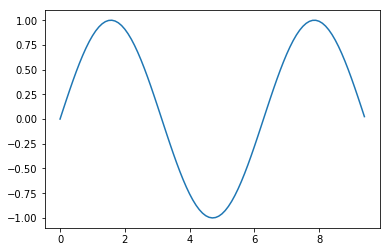

In [21]:
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

We can easily plot multiple lines at once and add a title, legend and axis labels:

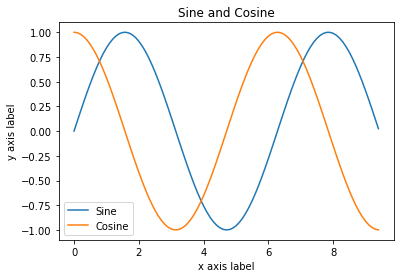

In [22]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots

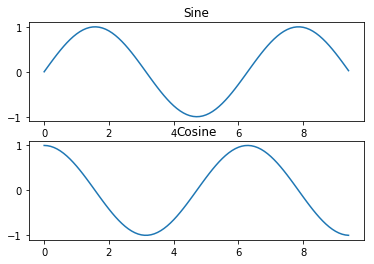

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can use the imshow function to show images.

Note that some image manipulation functions require the package Pillow to work.

/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


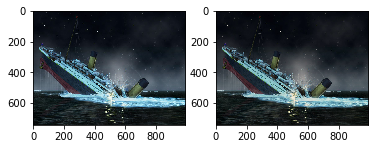

In [24]:
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

img = imread('fig/titanic_01.jpg')
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))